In [1]:
import pdb
import sys
from scipy.io import readsav
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from pseudospectrumwrapper import PseudoSpectrumWrapper
from pseudospectrum import PseudoSpectrum
from pseudospectrumplots import PseudoSpectrumPlots
from toolbox import Toolbox

from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
iterations = 1

In [3]:
# Define Path to configuration file
path_ini_file = os.path.join(".","config","sptXspt.ini")

In [4]:
# Use PseudoSpectrum to read in config file
mask='hanning'
#mask='kaiser'
pseudospectrum_object = PseudoSpectrumWrapper(path_ini_file,
                                              read_maps=True,
                                              save_automatically=True,
                                              overwrite_results=True,
                                              mask=mask,
                                              #mask={mask: 6},
                                             )
pseudospectrum_object = PseudoSpectrumPlots(pseudospectrum_object)
pseudospectrum_object.copy_config_file(path_ini_file, overwrite_results=True)

In [5]:
pseudospectrum_object.maps_dict.keys()

dict_keys(['spt_psw', 'spt_pmw', 'spt_plw'])

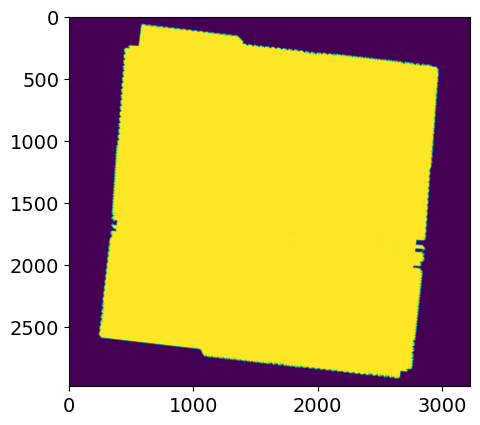

In [6]:
plt.imshow(pseudospectrum_object.maps_dict['spt_plw']['masks']['mask']);

In [7]:
pseudospectrum_object.maps_dict['spt_plw']['masks'].keys()

dict_keys(['mask', 'hanning'])

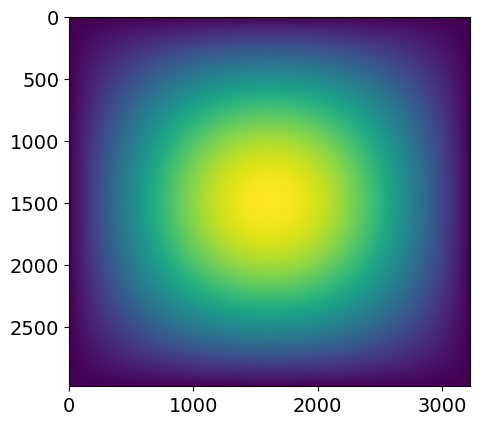

In [8]:
plt.imshow(pseudospectrum_object.maps_dict['spt_plw']['masks'][mask]);

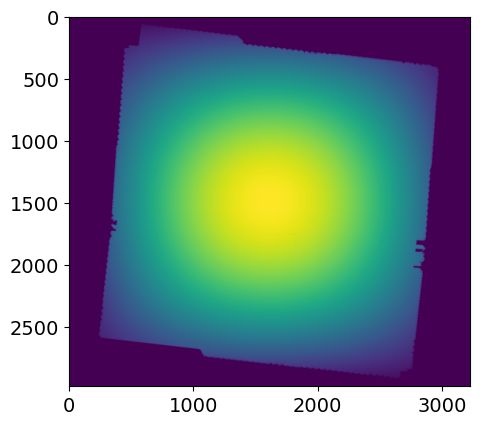

In [9]:
plt.imshow(pseudospectrum_object.maps_dict['spt_plw']['masks']['mask']*
           pseudospectrum_object.maps_dict['spt_plw']['masks'][mask]);

In [10]:
# Create MKK
mkk_dict = pseudospectrum_object.get_mkks(iterations=iterations,overwrite=True)

Calculating spt_pswxspt_pswx1 mkk
Iteration 1/1
Calculating spt_pswxspt_pmwx1 mkk
Iteration 1/1
Calculating spt_pmwxspt_pswx1 mkk
Iteration 1/1
Calculating spt_pmwxspt_pmwx1 mkk
Iteration 1/1
Calculating spt_plwxspt_plwx1 mkk
Iteration 1/1


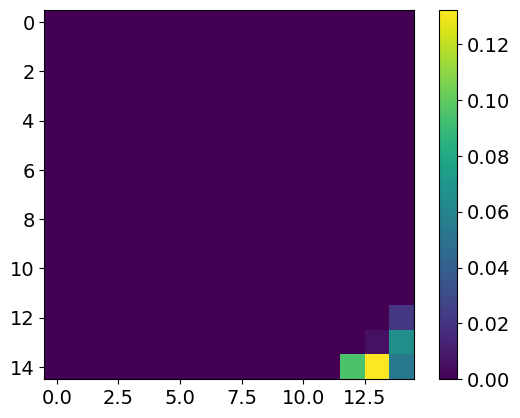

In [11]:
plt.imshow(mkk_dict['spt_plwxspt_plwx{0:0.0f}'.format(iterations)]);
plt.colorbar();

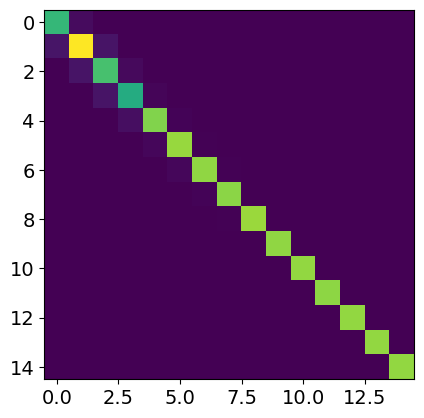

In [11]:
plt.imshow(mkk_dict['spt_plwxspt_plwx{0:0.0f}'.format(iterations)]);

In [10]:
maps_dict = pseudospectrum_object.maps_dict

In [11]:
mkk_dict.keys()

NameError: name 'mkk_dict' is not defined

In [13]:
pk_dict = pseudospectrum_object.get_pseudospectra(mkk_dict=None, maps_dict=maps_dict, iterations=iterations, overwrite=True)

Calculating spt_pswXspt_pswX1 pk
Calculating spt_pswXspt_pswX1 pk
Calculating spt_pswXspt_pmwX1 pk
Calculating spt_pswXspt_pmwX1 pk
Calculating spt_pmwXspt_pswX1 pk
Calculating spt_pmwXspt_pswX1 pk
Calculating spt_pmwXspt_pmwX1 pk
Calculating spt_pmwXspt_pmwX1 pk
Calculating spt_plwXspt_plwX1 pk
Calculating spt_plwXspt_plwX1 pk


In [14]:
pseudospectrum_object.maps_dict.keys()


dict_keys(['spt_psw', 'spt_pmw', 'spt_plw'])

3315502


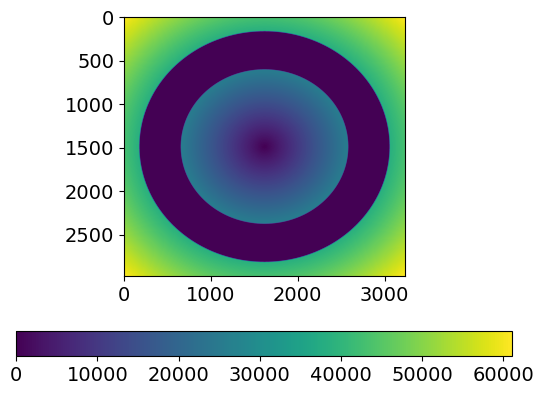

In [15]:
kmap=pseudospectrum_object.maps_dict['spt_psw']['kmap'].copy()
ell=pk_dict['spt_pswxspt_psw']['ell']
ind_ell = (kmap >= ell[13]) & (kmap < ell[14])
print(np.sum(ind_ell))
kmap[ind_ell] = 0
dims=np.shape(kmap)
plt.imshow(Toolbox.shift_twod(kmap,dims[1]/2,dims[0]/2))
plt.colorbar(orientation="horizontal");

3315502


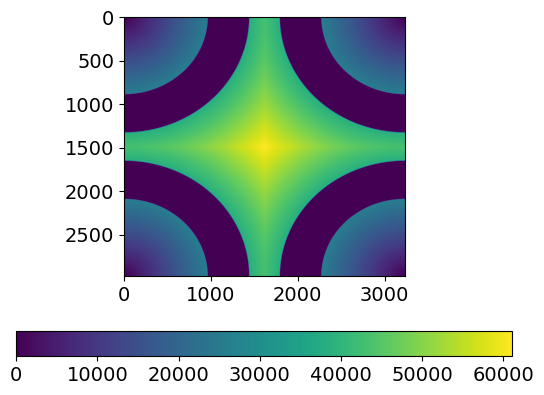

In [17]:
kmap=pseudospectrum_object.maps_dict['spt_psw']['kmap'].copy()
ell=pk_dict['spt_pswxspt_psw']['ell']
ind_ell = (kmap >= ell[13]) & (kmap < ell[14])
print(np.sum(ind_ell))
kmap[ind_ell] = 0
dims=np.shape(kmap)
plt.imshow(Toolbox.shift_twod(kmap,dims[1]/2,dims[0]/2))
plt.colorbar(orientation="horizontal");

3315502


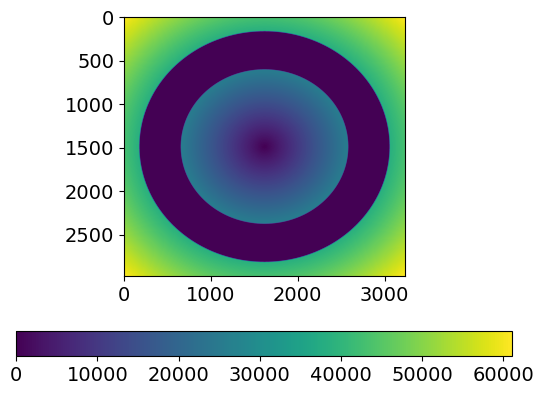

In [18]:
kmap=pseudospectrum_object.maps_dict['spt_psw']['kmap'].copy()
ell=pk_dict['spt_pswxspt_psw']['ell']
ind_ell = (kmap >= ell[13]) & (kmap < ell[14])
print(np.sum(ind_ell))
kmap[ind_ell] = 0
#dims=np.shape(kmap)
#plt.imshow(Toolbox.shift_twod(kmap,dims[1]/2,dims[0]/2))
plt.imshow(kmap)
plt.colorbar(orientation="horizontal");

3315502


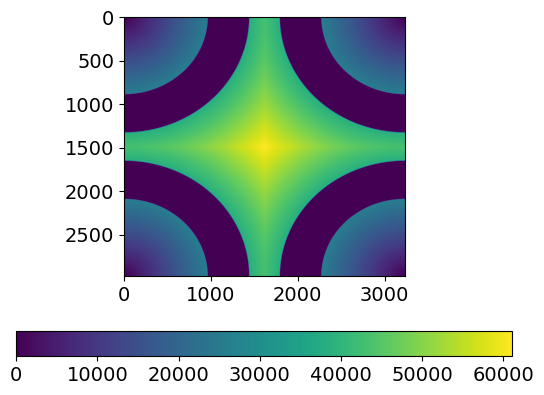

In [16]:
kmap=pseudospectrum_object.maps_dict['spt_psw']['kmap'].copy()
ell=pk_dict['spt_pswxspt_psw']['ell']
ind_ell = (kmap >= ell[13]) & (kmap < ell[14])
print(np.sum(ind_ell))
kmap[ind_ell] = 0
#dims=np.shape(kmap)
#plt.imshow(Toolbox.shift_twod(kmap,dims[1]/2,dims[0]/2))
plt.imshow(kmap)
plt.colorbar(orientation="horizontal");

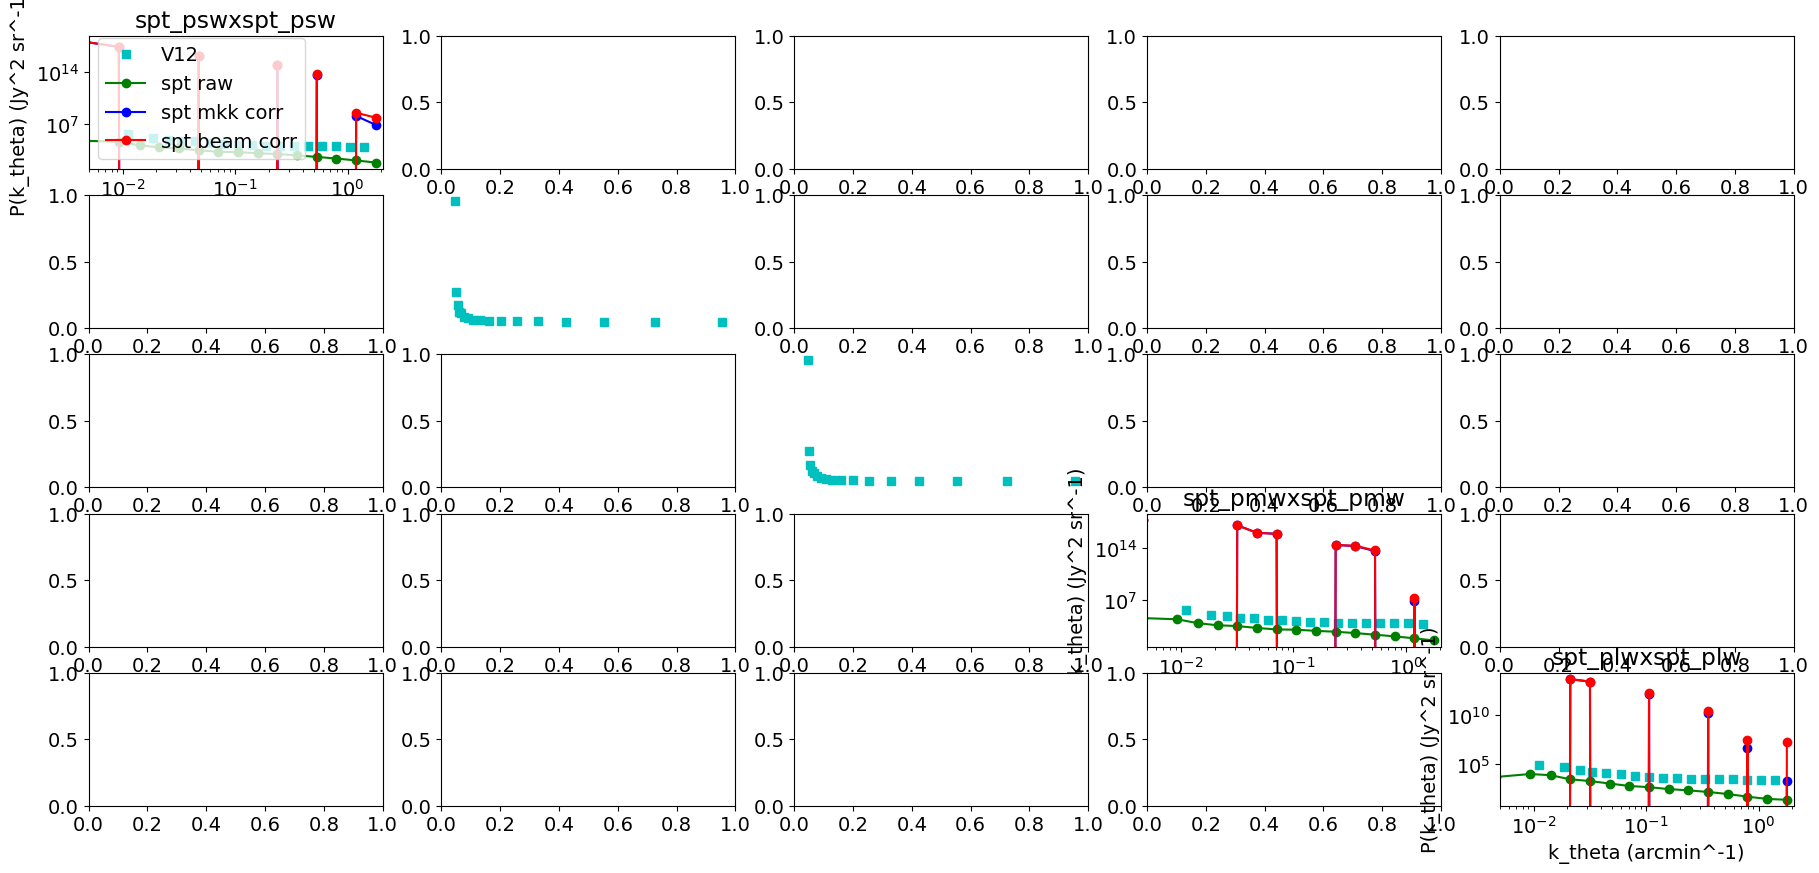

In [19]:
pseudospectrum_object.plot_pseudospectra(pk_dict)

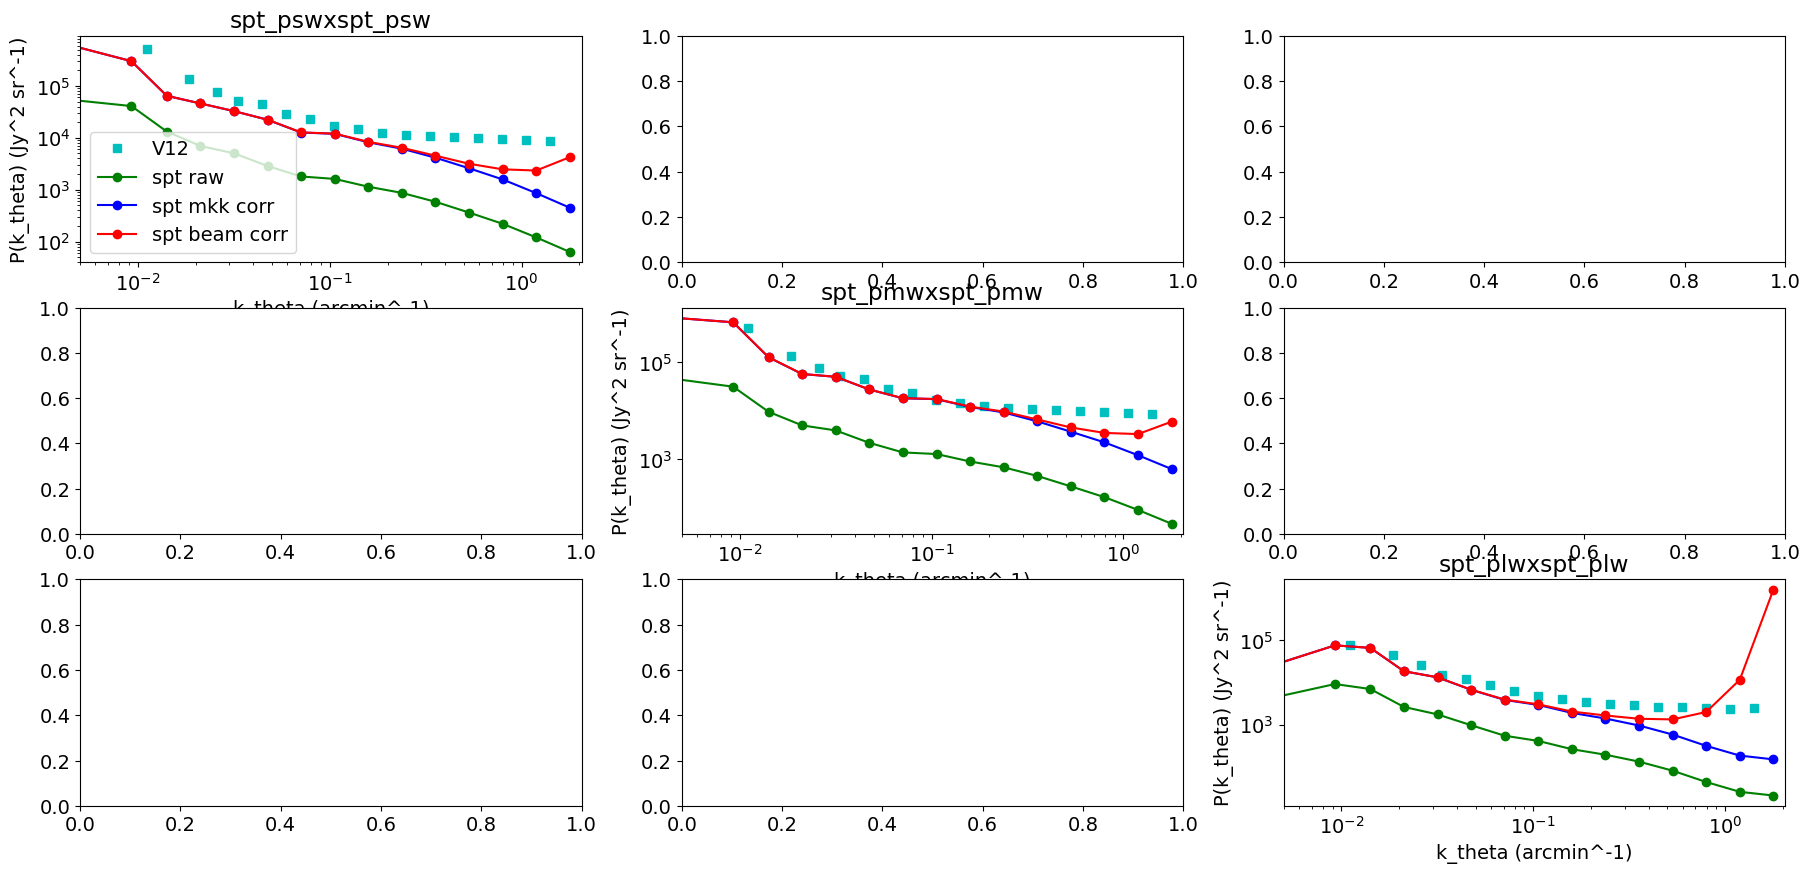

In [17]:
pseudospectrum_object.plot_pseudospectra(pk_dict)

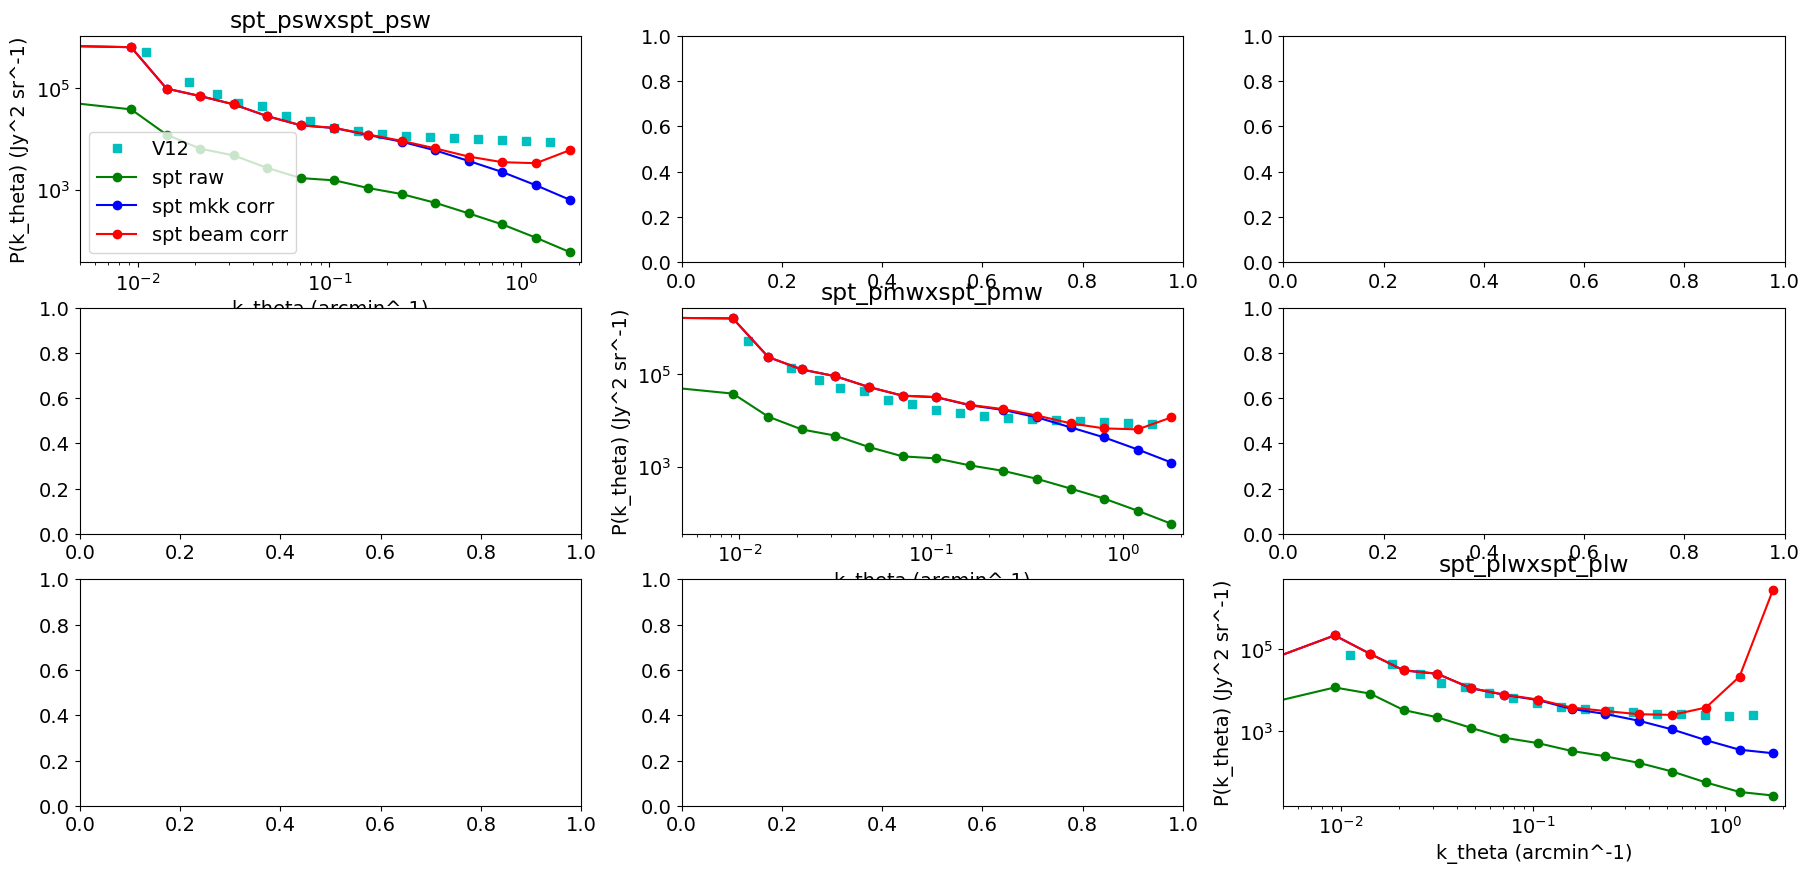

In [17]:
pseudospectrum_object.plot_pseudospectra(pk_dict)